# Some examples of how to load klayout technology definition

In [1]:
# Reload modules every time code is called. Set autoreload 0 to disable
%load_ext autoreload
%autoreload 2

# Jupyter notebook specific
%config InlineBackend.figure_format = 'retina'
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)
import numpy as np

In [2]:
import phidl.technology as tech
from phidl import quickplot as qp

In [3]:
print('Initial: ', tech.get_technology_name())  # At first, this picks the last technology used in the klayout application
tech.set_technology_name('OLMAC')

Initial:  OLMAC


In [4]:
# Load in the layer properties, SiEPIC approach
# tech.get_technology()

# Load in the layer properties in phidl LayerSet format
# tech.get_LayerSet()

In [5]:
# Let's say for some reason you want to see the drc files
print(tech.tech_files_matching('*.lydrc'))

['/Users/atait/.klayout/salt/soen_olmac_pdk/tech/OLMAC/drc/OLMAC.lydrc']


## Properties
Files of interest are `.xml`

In [6]:
# load in some properties generically
x = tech.get_properties_from_file()
x

{'vias': {'via': [{'name': 'NW Pad to Wiring',
    'resistance': '0.0',
    'resistivity': '0.0',
    'via_component': {'layer': 'v3', 'min_size': '10.0'},
    'component': [{'layer': 'm1_nwpad', 'inclusion': '4.0'},
     {'layer': 'm5_wiring', 'inclusion': '2.0'}]},
   {'name': 'LED Pad to Wiring',
    'resistance': '0.0',
    'resistivity': '0.0',
    'via_component': {'layer': None, 'min_size': '10.0'},
    'component': [{'layer': 'm4_ledpad', 'inclusion': '2.0'},
     {'layer': 'm5_wiring', 'inclusion': '1.0'}]},
   {'name': 'Bond Pad',
    'resistance': '0.0',
    'via_component': {'layer': 'v5', 'min_size': '40.0'},
    'component': {'layer': 'm5_wiring', 'inclusion': '5.0'}},
   {'name': 'Probe Pad',
    'resistance': '0.0',
    'via_component': {'layer': 'v5', 'min_size': '100.0'},
    'component': {'layer': 'm5_wiring', 'inclusion': '5.0'}}]},
 'waveguides': {'waveguide': [{'name': 'Strip',
    'radius': '5.0',
    'loss': '0.0',
    'component': {'layer': 'wg_deep', 'width': 

In [7]:
print(tech.wgXSection())
tech.wgXSection('Strip')

['Strip', 'Ridge']


WGXSection(components=[WGXSectionComponent(layer=wg_deep, width=0.5, offset=0.0)], radius=5.0, loss=0.0)

In [8]:
tech.CONDUCTORS
x = tech.CONDUCTORS['Silicon Rib'].doped_with('N')
y = tech.CONDUCTORS['Silicon Rib - N']


AttributeError: module 'phidl.technology' has no attribute 'CONDUCTORS'

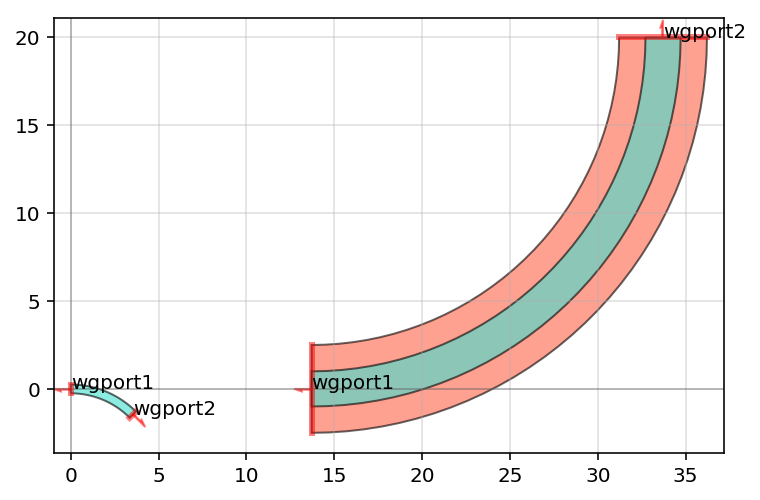

In [9]:
import phidl.geometry as pg
from phidl import Device
    

D = Device('bends')
w1 = D.add_ref(tech.wgXSection('Strip').cell_bend(theta=-45))
w2 = D.add_ref(tech.wgXSection('Ridge').cell_bend())
w2.xmin = w1.xmax + 10
qp(D)

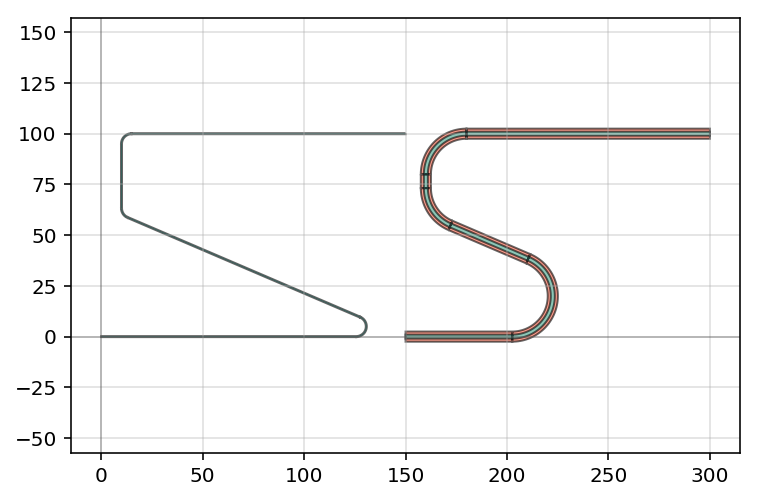

In [10]:
D = Device('routes')
zshape = np.array([(0,0), (150, 0), (10, 60), (10, 100), (150, 100)])
# zshape = np.array([(10,10), (20,30)])
w3 = D.add_ref(tech.wgXSection('Strip').cell_points(zshape))
zshape[:,0] = zshape[:,0] + 150
w4 = D.add_ref(tech.wgXSection('Ridge').cell_points(zshape))
qp(D)

In [12]:
TR = tech.transitions('Strip to Ridge')
TR

Transition(length=7.0, bezier=0.0, loss=0.0, source=Strip, dest=Ridge)

In [13]:
x1 = 10
D = Device()
w1 = D.add_ref(tech.wgXSection('Strip').cell_points([(0, 0), (x1, 0)]))

tr = D.add_ref(TR.cell())
tr.move(tr.ports['wgport1'], (x1, 0))

x2 = x1 + TR.length
x3 = 30
w2 = D.add_ref(tech.wgXSection('Ridge').cell_points([(x2, 0), (x3, 0)]))

tr = D.add_ref(TR.cell(inverted=True))
tr.move(tr.ports['wgport1'], (x3, 0))

x4 = x3 + TR.length
w2 = D.add_ref(tech.wgXSection('Strip').cell_points([(x4, 0), (40, 0)]))

qp(D)

NameError: name 'WAVEGUIDES' is not defined

In [184]:
D.ports

{}